Gradient Tape basic

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [2]:
test1 = [1,2,3]
test2 = [10,20,30]

In [3]:
t1 = tf.Variable(test1, dtype=tf.float32)
t2 = tf.Variable(test2, dtype=tf.float32)

In [4]:
with tf.GradientTape() as tape:
  t3 = t1*t2

gradient = tape.gradient(t3,[t1, t2])
print(gradient[0])
print(gradient[1])

tf.Tensor([10. 20. 30.], shape=(3,), dtype=float32)
tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)


In [5]:
test1 = [1,2,3]
test2 = [10,20,30]

In [6]:
t1 = tf.constant(test1, dtype=tf.float32)
t2 = tf.constant(test2, dtype=tf.float32)

with tf.GradientTape() as tape:
  #tape.watch(t1)
  t3 = t1*t2
  
  gradient = tape.gradient(t3,[t1,t2])

In [7]:
print(gradient[0])

None


In [8]:
# Variable 바뀌는 매개변수
# constant 바뀌지 않는 상수 .watch로 강제로 학습 가능

Gradient Tape을 이용한 linear regression

In [9]:
x_data =[[1.],[2.],[3.],[4.]]
y_data =[[1.],[3.],[5.],[7.]]

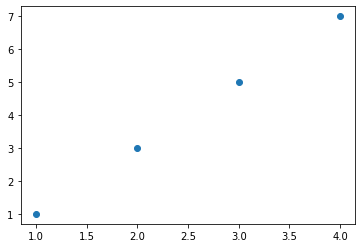

In [10]:
plt.plot(x_data, y_data, 'o')

In [11]:
## 평균 0, 분산 1의 파라미터의 정규분포로 부터 값을 가져옴.
# 학습을 통해 업데이트가 되어 변화되는 모델의 파라미터인 w,b를 의미한다.
W=tf.Variable(tf.random.normal((1,1),mean=0, stddev=1.0))
b=tf.Variable(tf.random.normal((1,1),mean=0, stddev=1.0))
lr=0.001
history = np.zeros([2000,3], 'float32')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


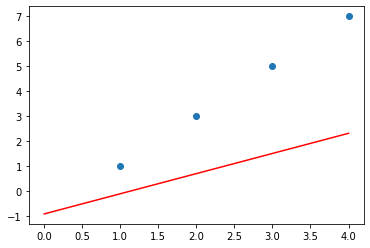

In [12]:
w = np.array(W)
w = w.reshape(1)
B = np.array(b)
B = B.reshape(1)

plt.plot(x_data, y_data, 'o')
plt.plot([0,4], [b, (w*4 +B)], 'r-')

In [13]:
w_trace = []
b_trace = []

In [14]:
for epoch in range(2000):
    total_error = 0

    for x, y in zip(x_data, y_data):
        with tf.GradientTape() as tape:
            y_hat = W * x + b
            error = (y_hat - y) **2
        
        gradients = tape.gradient(error, [W, b])

        W = tf.Variable(W - lr * gradients[0])
        b = tf.Variable(b - lr * gradients[1])

        w_trace.append(W.numpy())
        b_trace.append(b.numpy())

        visual_error = tf.square(error)
        total_error = total_error + visual_error

    print("epoch : ", epoch, "error :", total_error/len(x_data))
    history[epoch,:] = [(total_error/len(x_data))[0], W[0], b[0]]

epoch :  0 error : tf.Tensor([[148.50505]], shape=(1, 1), dtype=float32)
epoch :  1 error : tf.Tensor([[114.01103]], shape=(1, 1), dtype=float32)
epoch :  2 error : tf.Tensor([[87.57002]], shape=(1, 1), dtype=float32)
epoch :  3 error : tf.Tensor([[67.29496]], shape=(1, 1), dtype=float32)
epoch :  4 error : tf.Tensor([[51.742157]], shape=(1, 1), dtype=float32)
epoch :  5 error : tf.Tensor([[39.80706]], shape=(1, 1), dtype=float32)
epoch :  6 error : tf.Tensor([[30.644192]], shape=(1, 1), dtype=float32)
epoch :  7 error : tf.Tensor([[23.606377]], shape=(1, 1), dtype=float32)
epoch :  8 error : tf.Tensor([[18.1981]], shape=(1, 1), dtype=float32)
epoch :  9 error : tf.Tensor([[14.039846]], shape=(1, 1), dtype=float32)
epoch :  10 error : tf.Tensor([[10.840834]], shape=(1, 1), dtype=float32)
epoch :  11 error : tf.Tensor([[8.378285]], shape=(1, 1), dtype=float32)
epoch :  12 error : tf.Tensor([[6.481393]], shape=(1, 1), dtype=float32)
epoch :  13 error : tf.Tensor([[5.0191813]], shape=(1, 

In [15]:
w = np.array(W)
w = w.reshape(1)
B = np.array(b)
B = B.reshape(1)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


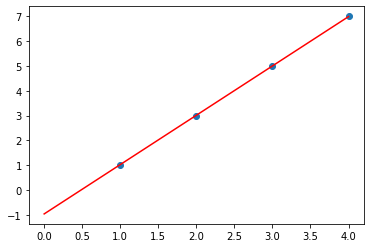

In [16]:
plt.plot(x_data, y_data, 'o')
plt.plot([0, 4], [b, (w*4 + B)], 'r-')

In [17]:
# 학습이 끝난 후 W와 b로 예측

print(history)
print("W :", W)
print("b:", b)
print("input 3", tf.add(tf.matmul([[3.]], W), b))
print("input 4", tf.add(tf.matmul([[4.]], W), b))

[[ 1.4850505e+02  8.7423241e-01 -8.8128978e-01]
 [ 1.1401103e+02  9.3809634e-01 -8.6007607e-01]
 [ 8.7570023e+01  9.9779469e-01 -8.4028482e-01]
 ...
 [ 1.5298887e-07  1.9862516e+00 -9.5923615e-01]
 [ 1.5225427e-07  1.9862680e+00 -9.5928514e-01]
 [ 1.5152179e-07  1.9862845e+00 -9.5933408e-01]]
W : <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[1.9862845]], dtype=float32)>
b: <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[-0.9593341]], dtype=float32)>
input 3 tf.Tensor([[4.99952]], shape=(1, 1), dtype=float32)
input 4 tf.Tensor([[6.985804]], shape=(1, 1), dtype=float32)


Text(0, 0.5, 'loss')

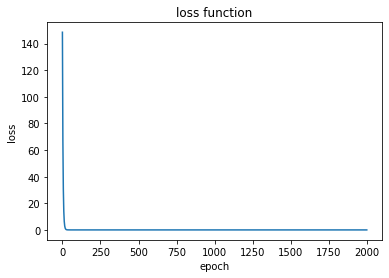

In [18]:
# loss function
plt.plot(history[:,0])
plt.title('loss function')
plt.xlabel('epoch')
plt.ylabel('loss')

In [19]:
a = np.array(w_trace)
a = a.reshape(8000,1)

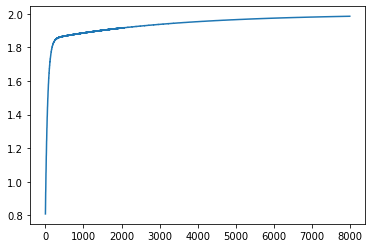

In [20]:
plt.plot(a)